<a href="https://colab.research.google.com/github/LokeRuiKee/AChE-GNN/blob/main/EDA_SMILES-Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference: https://www.kaggle.com/code/jocelyndumlao/smiles#--Import-Modules

In [4]:
%%capture
!pip install rdkit
!pip install colorama

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import math

rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# Load data

In [12]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/tx2c00283_si_002/SupplementalFiles/Human_dataset_1micromolar.xlsx"
df = pd.read_excel(file_path)

smiles_column = "SMILES"  # x/feature
y_column = "single-class-label"  # y/target

# other feature variables
InChI_column = "InChI"
chemId_column = "chem-id"
chemName = "chem-name"

In [13]:
df.head()

,SMILES,InChI,chem-id,chem-name,single-class-label
0,CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1,InChI=1S/C12H19N2O2/c1-13(2)12(15)16-11-8-6-7-...,CHEMBL54126,NEOSTIGMINE BROMIDE,1
1,O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2,InChI=1S/C24H32ClN3OS2/c25-17-10-11-20-22(16-1...,CHEMBL194823,LIPOCRINE,1
2,COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(C...,InChI=1S/C33H40ClN3O3/c1-39-30-18-22-17-23(33(...,CHEMBL3216655,NaN,1
3,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3...,InChI=1S/C26H26N2O5/c1-27-26(30)32-20-8-5-7-18...,CHEMBL340427,XANTHOSTIGMINE,1
4,CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2,InChI=1S/C18H19ClN2/c1-2-10-5-11-7-12(6-10)17-...,CHEMBL208599,HUPRINE X,1


In [16]:
# basic overview

# Print summary information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SMILES              4075 non-null   object
 1   InChI               4075 non-null   object
 2   chem-id             4075 non-null   object
 3   chem-name           284 non-null    object
 4   single-class-label  4075 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 159.3+ KB
None


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
SMILES                   0
InChI                    0
chem-id                  0
chem-name             3791
single-class-label       0
dtype: int64


# Basic Statistics and Distribution Analysis

- **Descriptive Statistics:** Generate basic statistics (mean, median, standard deviation, etc.) for any numerical columns if available. Since your dataset primarily consists of categorical/chemical identifiers, focus on unique counts and frequency distributions.

- **Distribution of the Target Variable:** Check the distribution of single-class-label. This is crucial as imbalanced classes can significantly impact the performance of your classification model. Plot the number of examples per class using a bar chart.

In [18]:
# Frequency counts for categorical data
print(df[chemId_column].value_counts())
print(df[chemName].value_counts())
print(df[y_column].value_counts())

chem-id
CHEMBL54126      1
152539           1
CHEMBL4083601    1
CHEMBL4086248    1
CHEMBL4070462    1
                ..
CHEMBL4776843    1
CHEMBL1773481    1
CHEMBL3582218    1
CHEMBL4213345    1
91723            1
Name: count, Length: 4075, dtype: int64
chem-name
NEOSTIGMINE BROMIDE                                                                                                                                     1
10-(2-Fluorobenzyl)benzo[g]pteridine-24(3H10H)-dione (7g)                                                                                               1
10-(4-Methoxybenzyl)benzo[g]pteridine-24(3H10H)-dione (7l)                                                                                              1
10-Propylbenzo[g]pteridine-24(3H10H)-dione (7a)                                                                                                         1
XANTHINE                                                                                                             

## interpretation
- dataset is slightly imbalanced, with more class 0 compared to class 1 (also shown in the distribution graph below)

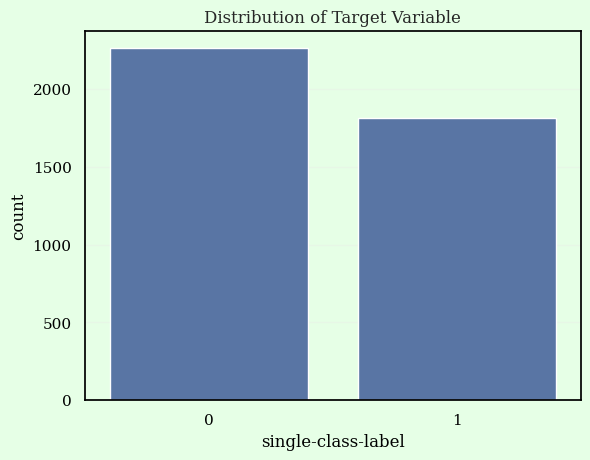

In [19]:
# Distribution of the Target Variable

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable
sns.countplot(x=y_column, data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [20]:
# Exploring unique chemical structures

print("Unique SMILES:", df[smiles_column].nunique())
print("Unique InChI:", df[InChI_column].nunique())

# To see the most common structures
print(df[smiles_column].value_counts().head())

Unique SMILES: 4075
Unique InChI: 4075
SMILES
CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1              1
O=c1nc2n(Cc3ccccc3F)c3ccccc3nc-2c(=O)[nH]1    1
CCCNc1nc(NCCc2ccccc2)c2ccccc2n1               1
COc1ccc(CCNc2nc(NC3CC3)nc3ccccc23)cc1OC       1
CC(C)Nc1nc(NCCc2ccccc2)c2ccccc2n1             1
Name: count, dtype: int64


## interpretation
- all of the SMILES and InChI are unique. No repeated data.

# Chemical Data Visualization

- **Molecular Structure Visualization:** Use RDKit to visualize some of the molecules from the SMILES strings to ensure that the data is correctly formatted and interpretable. This can help in understanding the molecular diversity in your dataset.
- **Property Calculation:** Calculate molecular descriptors or properties such as molecular weight, LogP, number of hydrogen bond donors and acceptors, number of rotatable bonds, etc., using RDKit. These properties can be useful for understanding the chemical space and diversity of your dataset.
- **Chemical Space Visualization:** Plot these properties to visualize the chemical space covered by your dataset. Techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) can be useful to reduce dimensionality and visualize high-dimensional data.

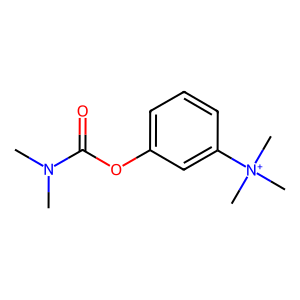

In [41]:
# Basic example

from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Example SMILES
smiles = "CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1"
mol = Chem.MolFromSmiles(smiles)

# Use RDKit's built-in display tool
display(Draw.MolToImage(mol))

- cross checked with https://www.cbligand.org/g/pain-ckb/job/w108/compare/b80839dc8427bd32/b57660f2c00e79aa

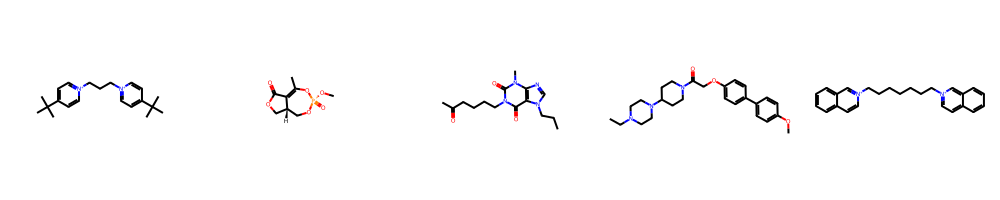

In [27]:
# Molecular Structure Visualization Using RDKit

from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Sample a few SMILES and convert them to images
sample_smiles = df[smiles_column].sample(n=5, random_state=1)
mols = [Chem.MolFromSmiles(smile) for smile in sample_smiles]
img = Draw.MolsToGridImage(mols, molsPerRow=5)  # Adjust molsPerRow based on your preference
display(img)

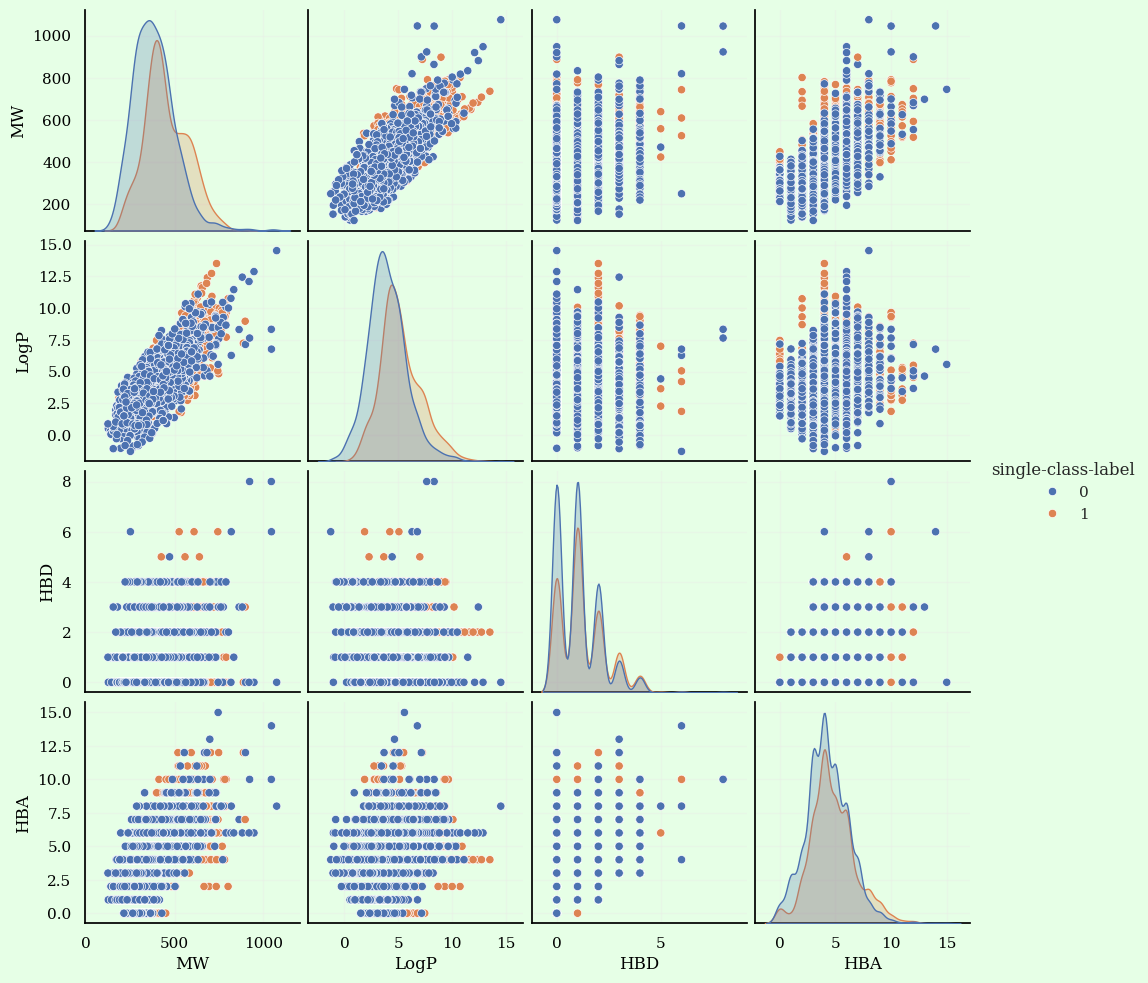

In [29]:
# Calculating and Visualizing Molecular Properties

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import seaborn as sns

# Compute molecular properties
def compute_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hbd = Descriptors.NumHDonors(mol)
        hba = Descriptors.NumHAcceptors(mol)
        return mw, logp, hbd, hba
    else:
        return None, None, None, None

df['MW'], df['LogP'], df['HBD'], df['HBA'] = zip(*df['SMILES'].map(compute_properties))

# Visualize properties
sns.pairplot(df[['MW', 'LogP', 'HBD', 'HBA', 'single-class-label']], hue='single-class-label')
plt.show()

## interpretation
-

# Graph Features Exploration

- **Node and Edge Analysis:** Calculate and visualize the distribution of number of nodes (atoms) and edges (bonds) per graph. These features can be important as they might correlate with the biological activity.
- **Feature Distribution:** If extracting node or edge features (e.g., atomic number, bond type), analyze their distributions. This could provide insights into the most common types of interactions or elements in active vs. inactive molecules.

In [30]:
# Convert SMILES to Graph

from rdkit import Chem
import networkx as nx

def smiles_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Convert RDKit molecule to NetworkX graph
        graph = nx.Graph()
        for atom in mol.GetAtoms():
            graph.add_node(atom.GetIdx(), atomic_num=atom.GetAtomicNum())
        for bond in mol.GetBonds():
            graph.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond_type=bond.GetBondTypeAsDouble())
        return graph
    else:
        return None

# Apply the function to the SMILES column
df['graph'] = df['SMILES'].apply(smiles_to_graph)

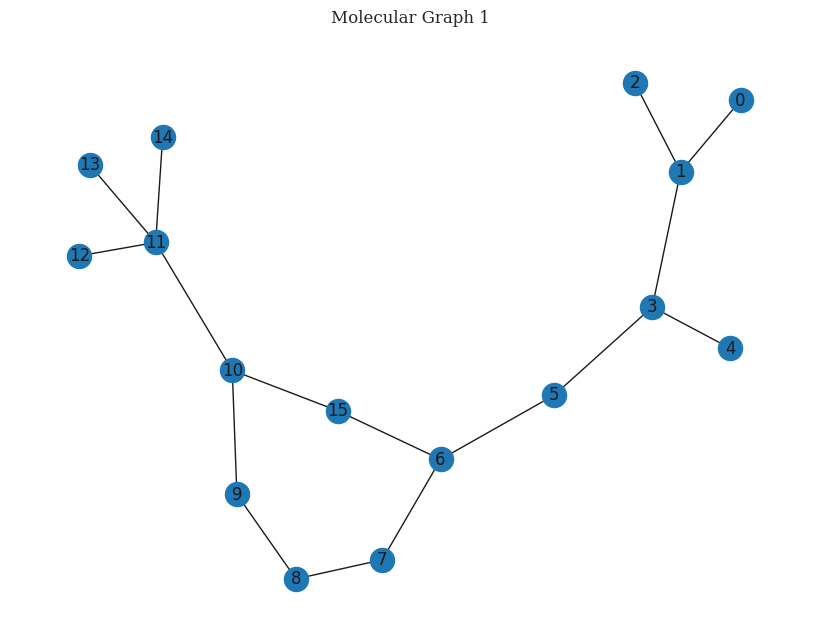

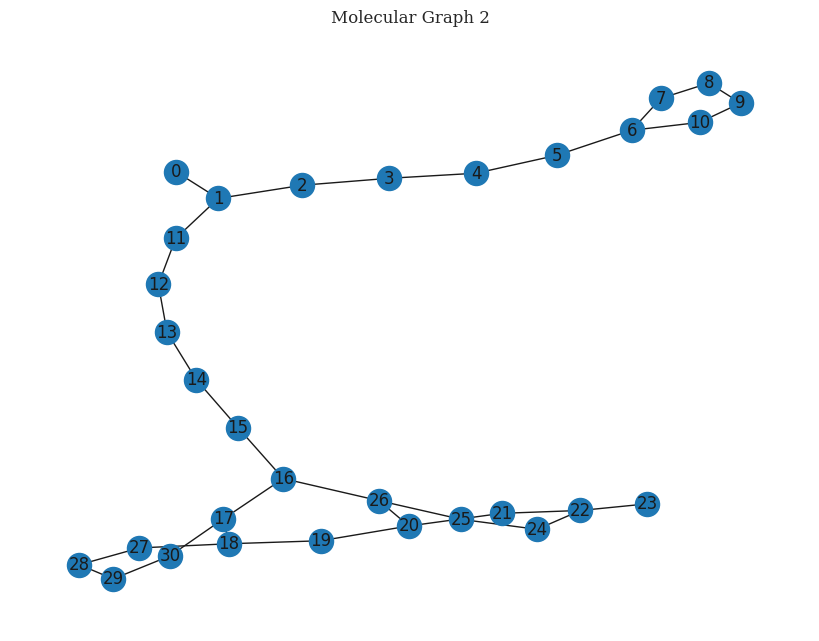

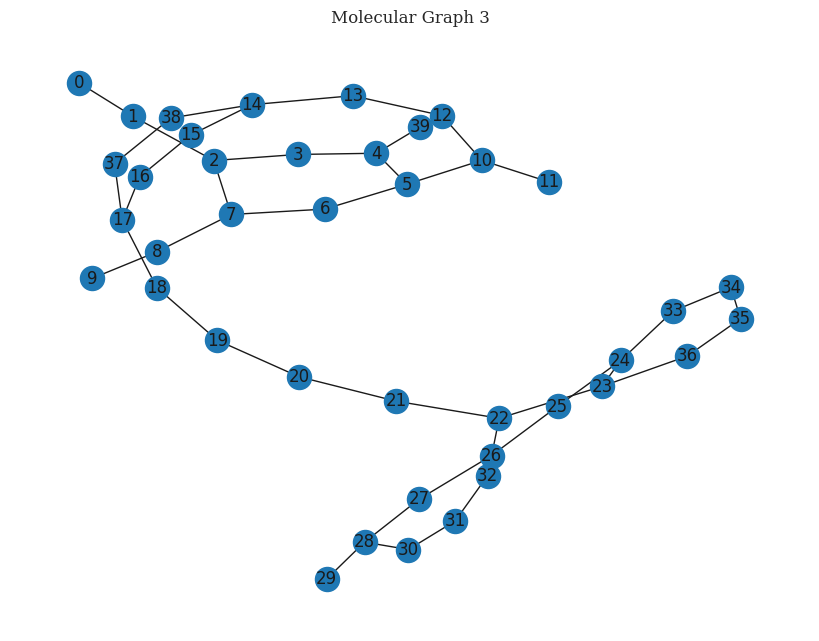

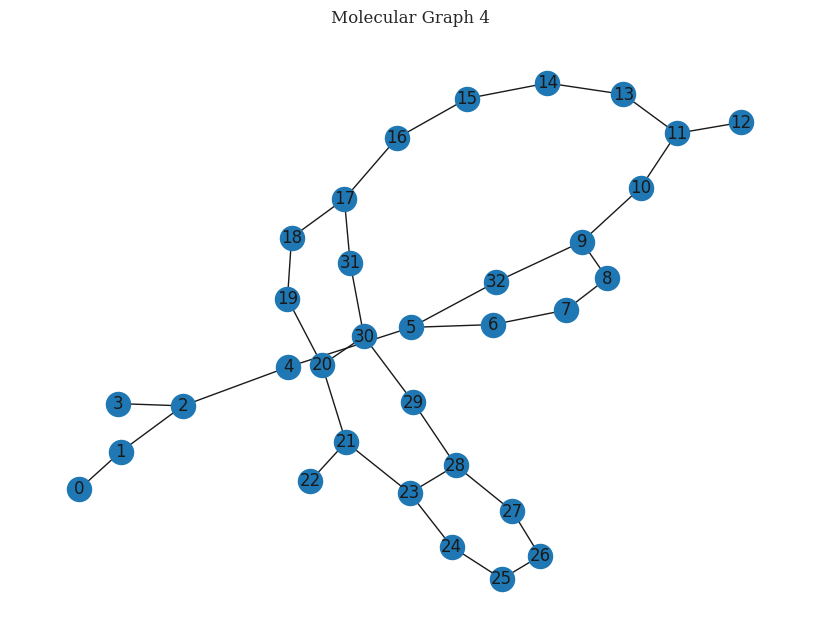

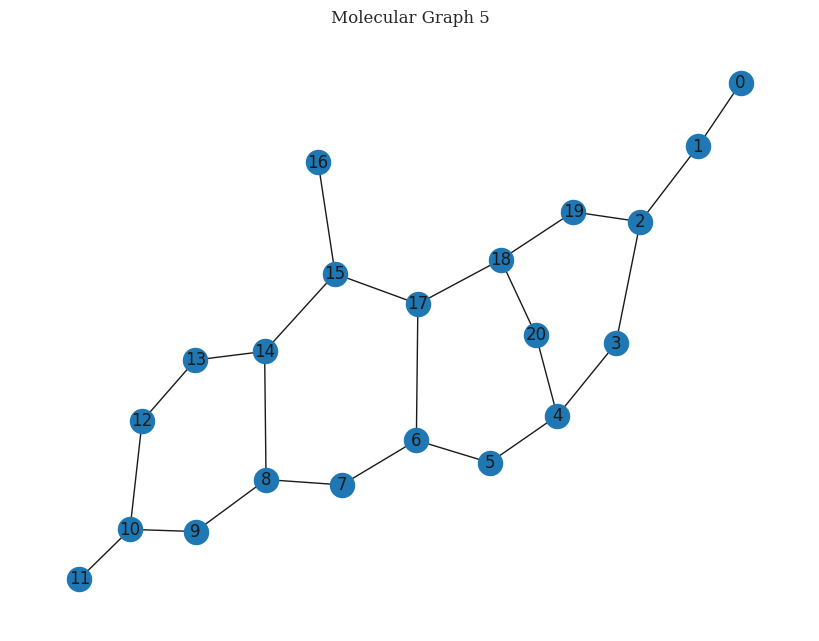

In [31]:
# Explore graph features

# Example: Compute node degree for each graph
df['node_degrees'] = df['graph'].apply(lambda graph: dict(graph.degree()) if graph is not None else None)

# Example: Compute number of nodes and edges for each graph
df['num_nodes'] = df['graph'].apply(lambda graph: len(graph.nodes) if graph is not None else None)
df['num_edges'] = df['graph'].apply(lambda graph: len(graph.edges) if graph is not None else None)

# Example: Compute density for each graph
df['density'] = df['graph'].apply(lambda graph: nx.density(graph) if graph is not None else None)

# Example: Check if each graph is connected
df['is_connected'] = df['graph'].apply(lambda graph: nx.is_connected(graph) if graph is not None else None)

# Example: Visualize the first few graphs
import matplotlib.pyplot as plt

for i, graph in enumerate(df['graph'].head()):
    plt.figure(figsize=(8, 6))
    nx.draw(graph, with_labels=True)
    plt.title(f'Molecular Graph {i+1}')
    plt.show()

In [33]:
print(df['node_degrees'])
print(df['num_nodes'])
print(df['num_edges'])
print(df['density'])
print(df['is_connected'])

0       {0: 1, 1: 3, 2: 1, 3: 3, 4: 1, 5: 2, 6: 3, 7: ...
1       {0: 1, 1: 3, 2: 2, 3: 2, 4: 2, 5: 2, 6: 3, 7: ...
2       {0: 1, 1: 2, 2: 3, 3: 2, 4: 3, 5: 3, 6: 2, 7: ...
3       {0: 1, 1: 2, 2: 3, 3: 1, 4: 2, 5: 3, 6: 2, 7: ...
4       {0: 1, 1: 2, 2: 3, 3: 2, 4: 3, 5: 2, 6: 3, 7: ...
                              ...                        
4070    {0: 1, 1: 2, 2: 3, 3: 2, 4: 4, 5: 1, 6: 1, 7: ...
4071    {0: 1, 1: 2, 2: 2, 3: 2, 4: 4, 5: 1, 6: 4, 7: ...
4072    {0: 1, 1: 3, 2: 2, 3: 4, 4: 1, 5: 1, 6: 1, 7: ...
4073    {0: 1, 1: 4, 2: 1, 3: 1, 4: 2, 5: 3, 6: 2, 7: ...
4074    {0: 1, 1: 3, 2: 2, 3: 4, 4: 1, 5: 1, 6: 1, 7: ...
Name: node_degrees, Length: 4075, dtype: object
0       16
1       31
2       40
3       33
4       21
        ..
4070    13
4071    14
4072    12
4073    17
4074    14
Name: num_nodes, Length: 4075, dtype: int64
0       16
1       34
2       45
3       36
4       24
        ..
4070    12
4071    13
4072    11
4073    17
4074    14
Name: num_edges, Length: 407

## interpretation
-

# Correlation Analysis
- Explore correlations between computed chemical properties and the target variable. This can sometimes reveal direct influences of certain properties on biological activity.

In [42]:
# Identify non-numeric columns, including derived features
non_numeric_columns = df[numerical_columns + ['node_degrees', 'density', 'is_connected', 'MW', 'LogP', 'HBD', 'HBA']].select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Exclude non-numeric columns, including derived features, from numerical_columns list
numerical_columns = [col for col in numerical_columns if col not in non_numeric_columns]

# Calculate Pearson correlation coefficient
pearson_corr = df[numerical_columns].corr()

# Calculate Spearman correlation coefficient
spearman_corr = df[numerical_columns].corr(method='spearman')

Non-numeric columns: Index(['node_degrees', 'is_connected'], dtype='object')


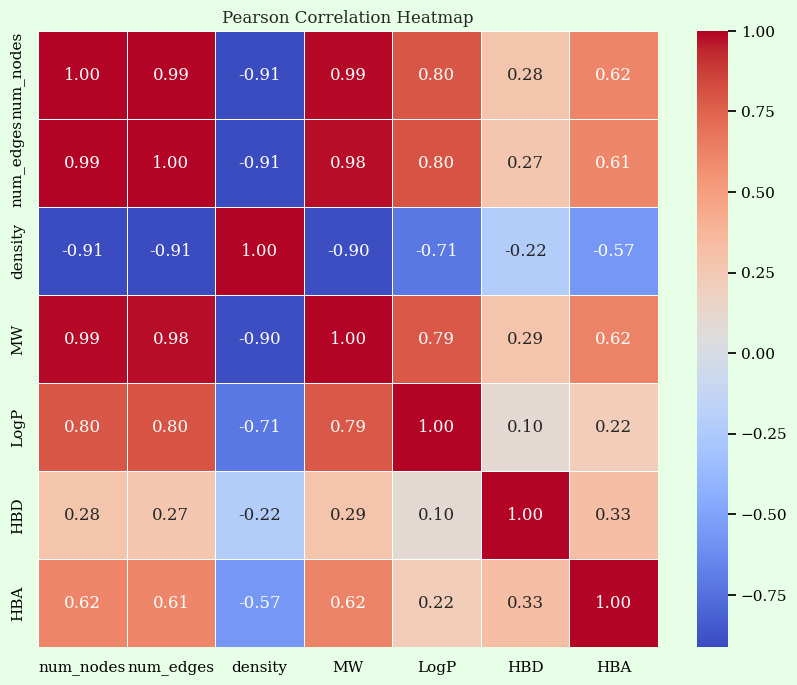

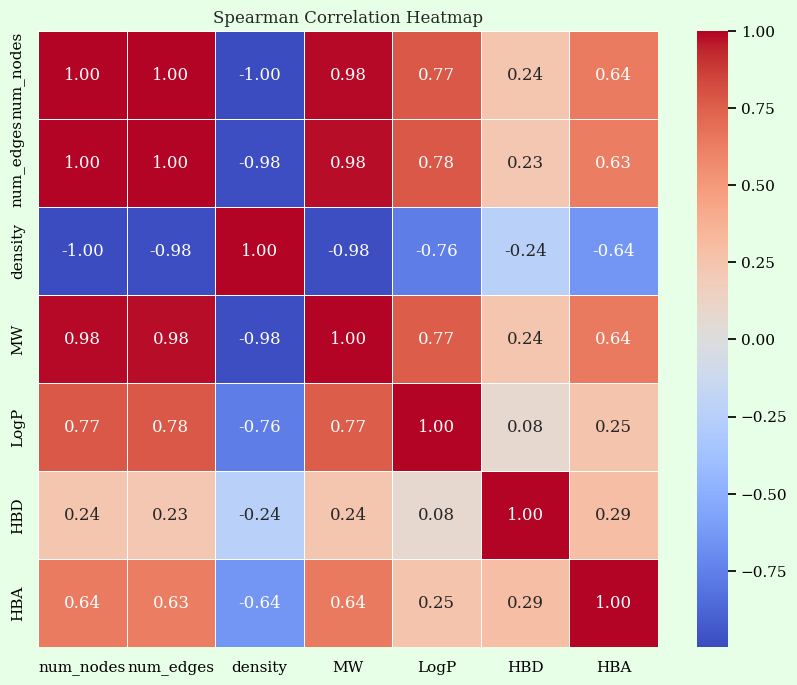

In [43]:
# only include numerical columns
numerical_columns = ['num_nodes', 'num_edges', 'density', 'MW', 'LogP', 'HBD', 'HBA']

# Calculate Pearson correlation coefficient
pearson_corr = df[numerical_columns].corr()

# Calculate Spearman correlation coefficient
spearman_corr = df[numerical_columns].corr(method='spearman')

# Visualize correlation heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

## interpretation
-

# Chemical Diversity Analysis
- **Similarity Analysis:** Compute molecular similarity (e.g., using Tanimoto similarity) between molecules to understand the diversity of your dataset. This is particularly important in drug discovery to ensure a wide coverage of the chemical space.

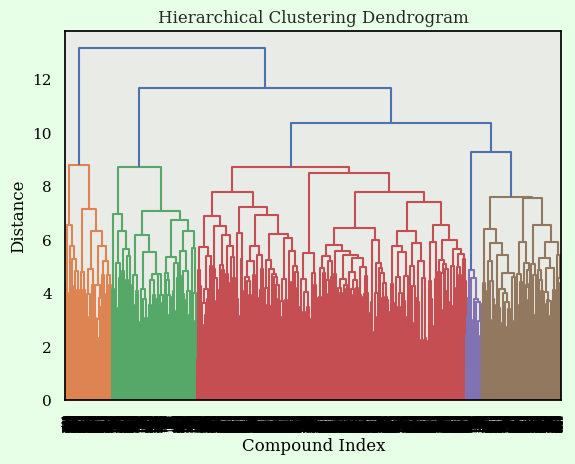

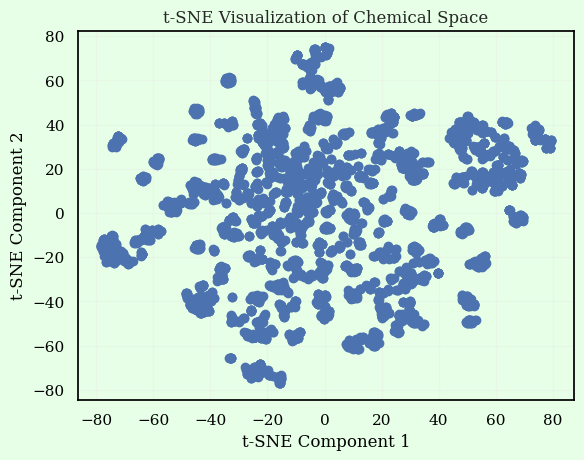

In [40]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import BulkTanimotoSimilarity

# Convert SMILES to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in df['SMILES']]

# Generate Morgan fingerprints for each molecule
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in molecules]

# Calculate pairwise Tanimoto similarity
similarity_matrix = []
for i in range(len(molecules)):
    sims = BulkTanimotoSimilarity(fingerprints[i], fingerprints)
    similarity_matrix.append(sims)

# Perform hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

clustering = linkage(similarity_matrix, method='complete', metric='euclidean')
dendrogram(clustering)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Compound Index')
plt.ylabel('Distance')
plt.show()

# Visualize chemical space using t-SNE
from sklearn.manifold import TSNE
import numpy as np

# Convert similarity_matrix to a 2D numpy array
similarity_matrix_array = np.array(similarity_matrix)

# Perform t-SNE transformation
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(similarity_matrix_array)

# Visualize the t-SNE embeddings
plt.scatter(embedded_data[:, 0], embedded_data[:, 1])
plt.title('t-SNE Visualization of Chemical Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## interpretation
-